In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sys
path_to_mavenn_local = '../../'
sys.path.insert(0,path_to_mavenn_local)

import mavenn
import time
from mavenn.src.utils import onehot_encode_array
from mavenn.src.validate import alphabet_dict

from scipy.sparse import csc_matrix
from scipy.sparse.linalg import lsqr

In [2]:
mavenn.__path__

['../../mavenn']

In [3]:
# load data
data_df = mavenn.load_example(which='test_data',name='gb1')
x = data_df['x'].values
y = data_df['y'].values

# oh-encode data
x_ohe = onehot_encode_array(x,
                            bases_dict=alphabet_dict['protein'].tolist(),
                            ohe_single_batch_size=len(data_df)-1)

In [4]:
start_time = time.time()
x_sparse = csc_matrix(x_ohe)
sparse_time = time.time()-start_time
f'Sparsing time: {sparse_time:.4f} seconds'

'Sparsing time: 1.3834 seconds'

In [6]:
start_time = time.time()
theta, istop, itn, r1norm = lsqr(x_sparse, (y-y.mean())/y.std())[:4]
training_time = time.time()-start_time
f'fit time {training_time:.4f} seconds'

'fit time 0.5171 seconds'

In [7]:
yhat = x_sparse.dot(theta)

<AxesSubplot:>

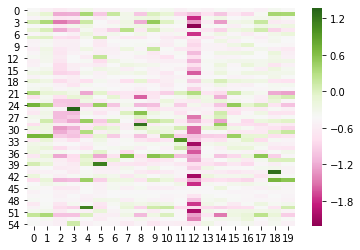

In [8]:
sns.heatmap(theta.reshape(55,20),cmap='PiYG')

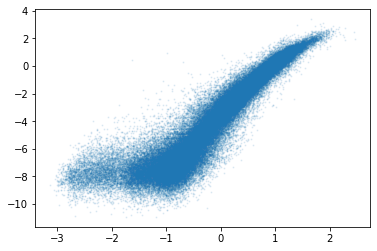

In [10]:
plt.scatter(yhat,y,s=1, alpha=.1)
plt.show()

In [11]:
func = lambda: 5
func()

5